<a href="https://colab.research.google.com/github/shubhro-jyoti/Hotel-Booking-analysis/blob/main/Shubhro_Jyoti_Das_Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = '/content/drive/MyDrive/cc/Hotel Bookings.csv'
df = pd.read_csv(path)

In [5]:
df.shape

(119390, 32)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [8]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [9]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

**Objective 1**: To find out Null values and cleaning it. 

In [10]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [11]:
df.agent

0           NaN
1           NaN
2           NaN
3         304.0
4         240.0
          ...  
119385    394.0
119386      9.0
119387      9.0
119388     89.0
119389      9.0
Name: agent, Length: 119390, dtype: float64

In [12]:
df.children

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
119385    0.0
119386    0.0
119387    0.0
119388    0.0
119389    0.0
Name: children, Length: 119390, dtype: float64

In [13]:
df.country

0         PRT
1         PRT
2         GBR
3         GBR
4         GBR
         ... 
119385    BEL
119386    FRA
119387    DEU
119388    GBR
119389    DEU
Name: country, Length: 119390, dtype: object

In [14]:
df.company

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
119385   NaN
119386   NaN
119387   NaN
119388   NaN
119389   NaN
Name: company, Length: 119390, dtype: float64

Since there are a lot of null values in the above dataset under the four columns: children, country, agent and company. Also, the datatype of those columns are not appropriate. Therefore, it is important to clean such values for further analysis of the data.

Put '0' for children

Put 'NaN' for agent

Put 'NaN' for Company

Put 'others' for Country

In [15]:
df['children'].fillna(0,inplace = True)
df['agent'].fillna('NaN',inplace = True)
df['company'].fillna('NaN',inplace = True)
df['country'].fillna('others',inplace = True)

In [16]:
#childrens cannot be in float, changing it to int
df['children'] = df['children'].astype(int)

In [17]:
#Checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  int64  
 11  babies                          119390 non-null  int64  
 12  meal            

In [18]:
# re-check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  int64  
 11  babies                          119390 non-null  int64  
 12  meal            

**Objective 2:** To analyse the dataset and visualise the given data.

**Objective 2.1:** To plot bargraph for number of guests in resort hotels and city hotels for 2015-2017 and make appropriate observations. 

In [19]:
# creating dataframe for number of guests per year from 2015 to 2017 for which bookings are not canceled
df = df.loc[df['is_canceled'] == 0]
num_guests_yearly=df.groupby(['arrival_date_year','hotel'])['arrival_date_year'].count().unstack()
num_guests_yearly

hotel,City Hotel,Resort Hotel
arrival_date_year,,
2015,7678,6176
2016,22733,13637
2017,15817,9125


Text(0.5, 0, 'Years')

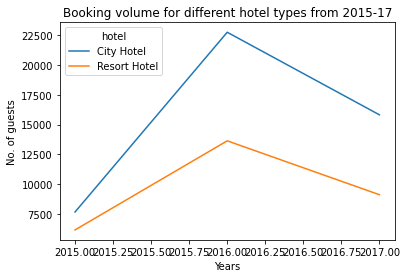

In [20]:
# plotting line graph for observing the trend of bookings from 2015-17
num_guests_yearly.plot()
plt.rcParams['figure.figsize'] = (10, 5)
plt.title('Booking volume for different hotel types from 2015-17')
plt.ylabel('No. of guests')
plt.xlabel('Years')

**Observation(s):** 
1. It is observed that 2015 had the lowest number of guests, among which city hotel guests were the lowest.
2. It is observed that 2016 had the highest number of guests, among which city hotel guests were the highest of all time.
3. It is observed that overall people prefer city hotels than resort hotels.

**Objective 2.2:** To determine the which type of guests (solo, couple or family) made the most number of bookings.

In [21]:
# creating dataframe for solo,couple and family guests
df['solo'] = df['adults'] == 1
df['couple'] = df['adults'] == 2
df['family'] = df['adults'] + df['children'] + df['babies'] >= 3
type_of_guests = ['Solo','Couple','Family']
total_guests = [df['solo'].sum(), df['couple'].sum(), df['family'].sum()]

guests_dataframe = pd.DataFrame(list(zip(type_of_guests,total_guests))).rename(columns = {0:'Type of guests', 1:'Number of guests'})
guests_dataframe

,Type of guests,Number of guests
0,Solo,16353
1,Couple,54422
2,Family,9506


Text(0.5, 1.0, 'Booking volume as per type of guests')

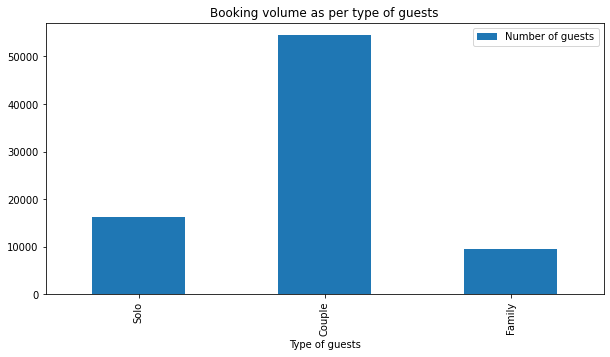

In [22]:
# plotting a bar graph for the different types of guests and booking volumes
guests_dataframe.plot(x = 'Type of guests', y = 'Number of guests',kind='bar')
plt.rcParams['figure.figsize'] = (10, 5)
plt.title('Booking volume as per type of guests')

**Observation(s):**
1. It is seen that most bookings were made by couples followed by solo travellers and then by guest who were with family.

**Objective 2.3:** Determining the holiday season or the season in which most guests arrived considering overall data of 2015-17.

In [23]:
# creating dataframe for number of guests and months 
month_guests_df = df['arrival_date_month'].value_counts().reset_index()
month_guests_df.columns=['Months','Number of guests']
Months = ['January','February','March','April','May','June','July','August','September','October','November','December']
month_guests_df['Months'] = pd.Categorical(month_guests_df['Months'],categories=Months, ordered=True)
final_month_guests_dataframe = month_guests_df.sort_values('Months').reset_index()
final_month_guests_dataframe

,index,Months,Number of guests
0,11,January,4122
1,8,February,5372
2,4,March,6645
3,5,April,6565
4,2,May,7114
5,6,June,6404
6,1,July,7919
7,0,August,8638
8,7,September,6392
9,3,October,6914


Text(0.5, 1.0, 'Trend of bookings across seasons')

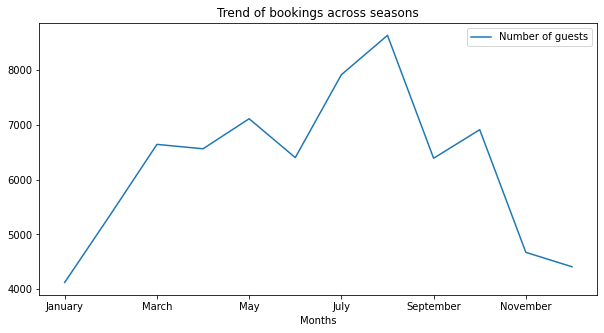

In [24]:
# plotting line graph for above dataframe
final_month_guests_dataframe.plot(x = 'Months', y='Number of guests')
plt.title('Trend of bookings across seasons')

**Observation(s):**
1. The holiday season starts from the month of June aand it peaks at the month of August after that it takes a deep dive.
2. It can also be seen that winter months receive the lowest number of actual guests bookings.
3. From the above graph we can also say that the best time to book a hotel is during the summer months as the holiday season is summer.  

**Objective 2.4:** To find out which type of hotel had the highest number of special requests.

In [25]:
# segregating actual requests apart from the overall dataset
df = df.loc[df['total_of_special_requests']!=0]
hotel_requests = df.groupby(['hotel'])['total_of_special_requests'].value_counts().unstack()

In [26]:
hotel_requests


total_of_special_requests,1,2,3,4,5
hotel,,,,,
City Hotel,16699,6403,1307,177,25
Resort Hotel,9209,3700,744,127,13


Text(0, 0.5, 'Number of special requests')

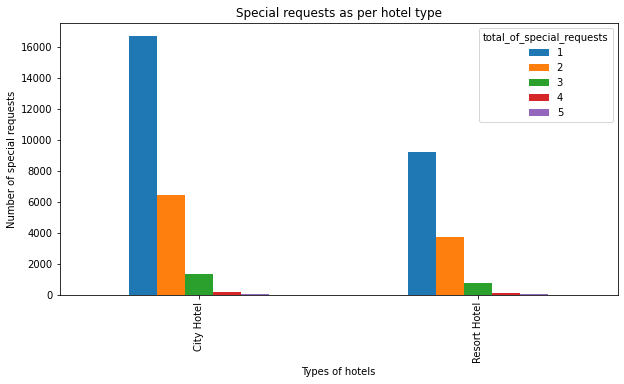

In [27]:
hotel_requests.plot(kind='bar')
plt.title('Special requests as per hotel type')
plt.xlabel('Types of hotels')
plt.ylabel('Number of special requests')

**Observation(s):**
1. In comparison among the type of hotels with respect to special requests it is observed that the city hotel received the highest number of special requests. 

**Objective 2.5:** To determine the average daily rate across months.

In [28]:
month_adr = df.groupby(['arrival_date_month','hotel'])['adr'].mean().unstack()
arrival_date_month = ['January','February','March','April','May','June','July','August','September','October','November','December']
reqd_dataframe = month_adr.sort_values('arrival_date_month',key = lambda x :  pd.Categorical(x,categories=arrival_date_month, ordered=True))
reqd_dataframe

hotel,City Hotel,Resort Hotel
arrival_date_month,,
January,85.541860,51.915577
February,90.521640,57.200652
March,93.440743,61.739606
April,116.377600,83.268311
May,127.538737,81.856321
June,120.031491,114.112886
July,123.235480,156.802543
August,126.483353,188.856023
September,122.298064,106.066796


Text(0.5, 0, 'Hotel Type')

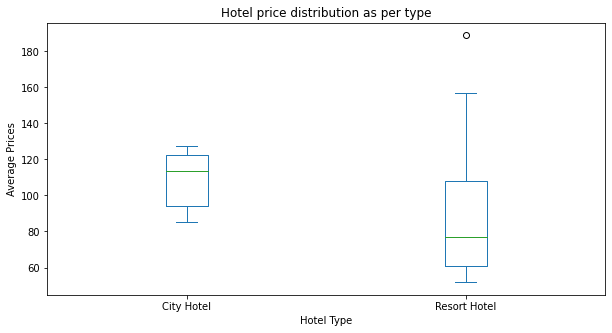

In [29]:
month_adr.plot(kind="box")
plt.title('Hotel price distribution as per type')
plt.ylabel('Average Prices')
plt.xlabel('Hotel Type')

**Observation(s):** 
1. It is observed that the average daily price is the highest in the holiday season which actually makes sense because the higher the demand the higher is the price.
2. It is observed that in the months of July and August the price of resort hotel was actually higher than city hotel, which maybe a reason why people preferred city hotel.
3. From the box plot we can see that the rates of city hotel is compact with regards to the rates of resort hotels which is more spread out. 